In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile

import os
from sklearn.model_selection import train_test_split 

for dirname, _, filenames in os.walk('hyundai_price(2020) data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_excel('Hyundai.xlsx', sheet_name='Hyundai')
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2017,14100,Semi-Auto,27299,Diesel,145,57.6,1.7
2,I10,2017,7495,Manual,25203,Petrol,30,57.7,1.2
3,IX35,2013,6998,Manual,80465,Diesel,145,53.3,1.7
4,Tucson,2016,11998,Manual,36512,Diesel,30,61.7,1.7
...,...,...,...,...,...,...,...,...,...
330,Tucson,2017,13000,Manual,26685,Diesel,30,61.7,1.7
331,Santa Fe,2017,18999,Automatic,20599,Diesel,150,42.8,2.2
332,Tucson,2019,15498,Manual,23773,Petrol,145,34.9,1.6
333,IX20,2017,9998,Manual,9604,Petrol,145,50.4,1.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             335 non-null    object 
 1   year              335 non-null    int64  
 2   price             335 non-null    int64  
 3   type              335 non-null    object 
 4   distance          335 non-null    int64  
 5   fuel              335 non-null    object 
 6   tax               335 non-null    int64  
 7   miles per galoon  335 non-null    float64
 8   size              335 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 23.7+ KB


В датасет нет пропущенных знaчений

In [5]:
df.isnull().sum()

model               0
year                0
price               0
type                0
distance            0
fuel                0
tax                 0
miles per galoon    0
size                0
dtype: int64

In [6]:
df.dtypes

model                object
year                  int64
price                 int64
type                 object
distance              int64
fuel                 object
tax                   int64
miles per galoon    float64
size                float64
dtype: object

In [7]:
df.describe()

,year,price,distance,tax,miles per galoon,size
count,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,2016.850746,11855.794030,23965.337313,114.119403,53.754030,1.494925
std,1.636538,4215.466046,16309.543799,61.460888,11.115859,0.373130
min,2011.000000,3799.000000,10.000000,0.000000,28.000000,1.000000
25%,2016.000000,8299.000000,12246.500000,30.000000,44.800000,1.200000
50%,2017.000000,11998.000000,20746.000000,145.000000,55.400000,1.600000
75%,2018.000000,14549.500000,35001.500000,145.000000,61.700000,1.700000
max,2020.000000,34998.000000,119050.000000,325.000000,78.500000,2.500000


In [8]:
df.columns

Index(['model', 'year', 'price', 'type', 'distance', 'fuel', 'tax',
       'miles per galoon', 'size'],
      dtype='object')

In [9]:
df.columns = ['model', 'year', 'price', 'type', 'distance', 'fuel', 'tax',
       'miles per galoon', 'size']

In [10]:
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std()
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std()
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [11]:
df = outliers(df)
df.describe()

,year,price,distance,tax,miles per galoon,size
count,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,2016.856365,11793.132491,23804.958022,114.035833,53.754030,1.494925
std,1.617895,3939.153774,15610.386090,61.191625,11.115859,0.373130
min,2011.941133,3799.000000,10.000000,0.000000,28.000000,1.000000
25%,2016.000000,8299.000000,12246.500000,30.000000,44.800000,1.200000
50%,2017.000000,11998.000000,20746.000000,145.000000,55.400000,1.600000
75%,2018.000000,14549.500000,35001.500000,145.000000,61.700000,1.700000
max,2020.000000,24502.192168,72893.968710,298.502068,78.500000,2.500000


In [12]:
df.shape

(335, 9)

In [13]:
df['type'].nunique()

3

In [14]:
for col in df:
    print(df['type'].unique())

['Manual' 'Semi-Auto' 'Automatic']
['Manual' 'Semi-Auto' 'Automatic']
['Manual' 'Semi-Auto' 'Automatic']
['Manual' 'Semi-Auto' 'Automatic']
['Manual' 'Semi-Auto' 'Automatic']
['Manual' 'Semi-Auto' 'Automatic']
['Manual' 'Semi-Auto' 'Automatic']
['Manual' 'Semi-Auto' 'Automatic']
['Manual' 'Semi-Auto' 'Automatic']


In [15]:
#encoding transmission
from sklearn import preprocessing
df['type'] = preprocessing.LabelEncoder().fit_transform(df['type'])
df.head(5)

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,I20,2017.0,7999.0,1,17307.00000,Petrol,145.0,58.9,1.2
1,Tucson,2017.0,14100.0,2,27299.00000,Diesel,145.0,57.6,1.7
2,I10,2017.0,7495.0,1,25203.00000,Petrol,30.0,57.7,1.2
3,IX35,2013.0,6998.0,1,72893.96871,Diesel,145.0,53.3,1.7
4,Tucson,2016.0,11998.0,1,36512.00000,Diesel,30.0,61.7,1.7


К числовому формату привели фактор type

In [16]:
df['fuel'].nunique()

3

In [17]:
for col in df:
    print(df['fuel'].unique())

['Petrol' 'Diesel' 'Hybrid']
['Petrol' 'Diesel' 'Hybrid']
['Petrol' 'Diesel' 'Hybrid']
['Petrol' 'Diesel' 'Hybrid']
['Petrol' 'Diesel' 'Hybrid']
['Petrol' 'Diesel' 'Hybrid']
['Petrol' 'Diesel' 'Hybrid']
['Petrol' 'Diesel' 'Hybrid']
['Petrol' 'Diesel' 'Hybrid']


In [18]:
#encoding fuel
from sklearn import preprocessing
df['fuel'] = preprocessing.LabelEncoder().fit_transform(df['fuel'])
df.head(5)

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,I20,2017.0,7999.0,1,17307.00000,2,145.0,58.9,1.2
1,Tucson,2017.0,14100.0,2,27299.00000,0,145.0,57.6,1.7
2,I10,2017.0,7495.0,1,25203.00000,2,30.0,57.7,1.2
3,IX35,2013.0,6998.0,1,72893.96871,0,145.0,53.3,1.7
4,Tucson,2016.0,11998.0,1,36512.00000,0,30.0,61.7,1.7


К числовому формату привели фактор fuel

In [19]:
df['model'].nunique()

12

In [20]:
for col in df:
    print(df['model'].unique())

['I20' 'Tucson' 'I10' 'IX35' 'I30' 'I800' 'IX20' 'Ioniq' 'Kona' 'Santa Fe'
 'Veloster' 'I40']
['I20' 'Tucson' 'I10' 'IX35' 'I30' 'I800' 'IX20' 'Ioniq' 'Kona' 'Santa Fe'
 'Veloster' 'I40']
['I20' 'Tucson' 'I10' 'IX35' 'I30' 'I800' 'IX20' 'Ioniq' 'Kona' 'Santa Fe'
 'Veloster' 'I40']
['I20' 'Tucson' 'I10' 'IX35' 'I30' 'I800' 'IX20' 'Ioniq' 'Kona' 'Santa Fe'
 'Veloster' 'I40']
['I20' 'Tucson' 'I10' 'IX35' 'I30' 'I800' 'IX20' 'Ioniq' 'Kona' 'Santa Fe'
 'Veloster' 'I40']
['I20' 'Tucson' 'I10' 'IX35' 'I30' 'I800' 'IX20' 'Ioniq' 'Kona' 'Santa Fe'
 'Veloster' 'I40']
['I20' 'Tucson' 'I10' 'IX35' 'I30' 'I800' 'IX20' 'Ioniq' 'Kona' 'Santa Fe'
 'Veloster' 'I40']
['I20' 'Tucson' 'I10' 'IX35' 'I30' 'I800' 'IX20' 'Ioniq' 'Kona' 'Santa Fe'
 'Veloster' 'I40']
['I20' 'Tucson' 'I10' 'IX35' 'I30' 'I800' 'IX20' 'Ioniq' 'Kona' 'Santa Fe'
 'Veloster' 'I40']


In [21]:
#encoding body
from sklearn import preprocessing
df['model'] = preprocessing.LabelEncoder().fit_transform(df['model'])
df.head(10)

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,1,2017.0,7999.0,1,17307.00000,2,145.0,58.9,1.2
1,10,2017.0,14100.0,2,27299.00000,0,145.0,57.6,1.7
2,0,2017.0,7495.0,1,25203.00000,2,30.0,57.7,1.2
3,6,2013.0,6998.0,1,72893.96871,0,145.0,53.3,1.7
4,10,2016.0,11998.0,1,36512.00000,0,30.0,61.7,1.7
5,1,2015.0,7995.0,1,6413.00000,2,30.0,55.4,1.2
6,2,2015.0,8998.0,1,16412.00000,2,145.0,48.7,1.4
7,10,2016.0,12298.0,1,35153.00000,0,30.0,61.7,1.7
8,1,2017.0,7798.0,1,14814.00000,2,150.0,55.4,1.2
9,4,2018.0,15299.0,0,34103.00000,0,145.0,33.6,2.5


К числовому формату привели фактор model

In [22]:
df.dtypes

model                 int32
year                float64
price               float64
type                  int32
distance            float64
fuel                  int32
tax                 float64
miles per galoon    float64
size                float64
dtype: object

# Визуализация факторов

<AxesSubplot:ylabel='Frequency'>

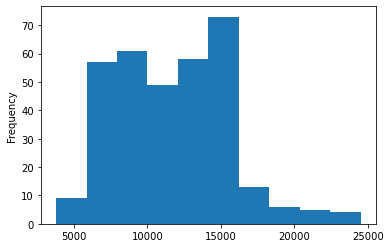

In [23]:
df['price'].plot(kind = 'hist')

Для большиства моделей цена варьируется от 6 до 16 тыс. у.е.

<AxesSubplot:ylabel='Frequency'>

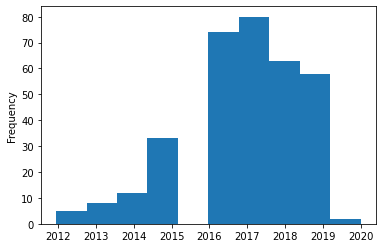

In [24]:
df['year'].plot(kind = 'hist')

Большинство моделей 2016-2019 года выпуска

<AxesSubplot:ylabel='Frequency'>

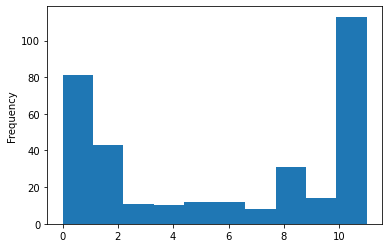

In [25]:
df['model'].plot(kind = 'hist')

Самая распространенная модель I40

<AxesSubplot:ylabel='Frequency'>

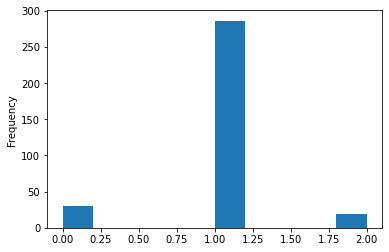

In [27]:
df['type'].plot(kind = 'hist')

Самая распространенная коробка передач - Semi-Auto

<AxesSubplot:ylabel='Frequency'>

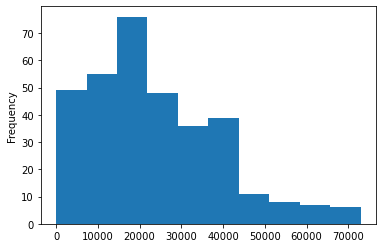

In [28]:
df['distance'].plot(kind = 'hist')

Большинство автомобилей имеют пробег до 45 тыс. км

<AxesSubplot:ylabel='Frequency'>

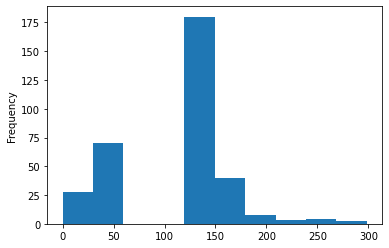

In [29]:
df['tax'].plot(kind = 'hist')

реимущественное большиство моделей выборки имеют налог 125-150 у.е.

<AxesSubplot:ylabel='Frequency'>

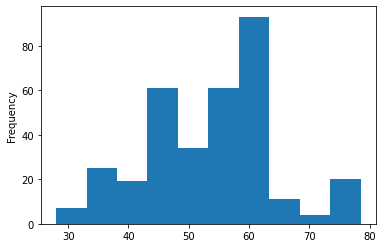

In [30]:
df['miles per galoon'].plot(kind = 'hist')

78 моделей имеют расход топлива 45-65 миль на галлон

<AxesSubplot:ylabel='Frequency'>

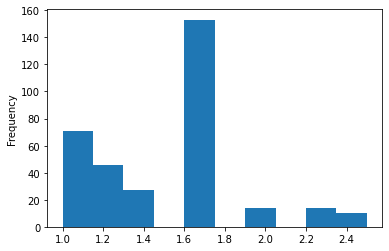

In [31]:
df['size'].plot(kind = 'hist')

Самый распространенный объем двигателя - 1.6 л

In [33]:
df.to_csv('hyundai1.csv', sep=',', index=False)

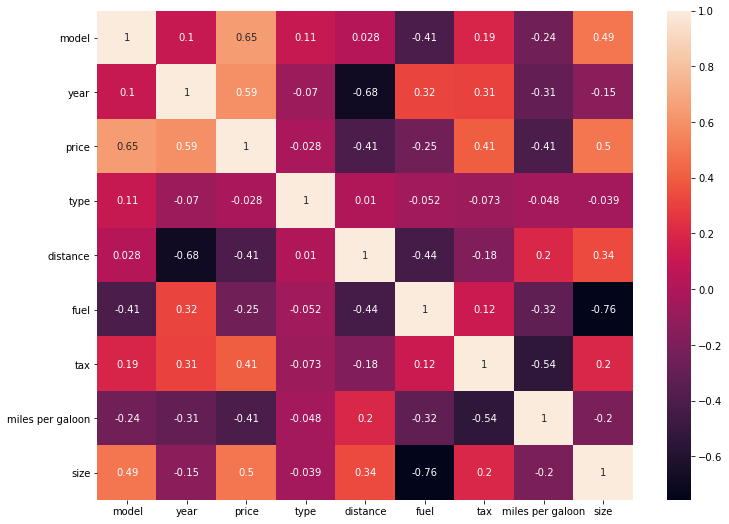

In [34]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Наибольшая корреляция между факторами Цена и модель, также сильная корелляция между факторами Цена и Год

In [35]:
df.describe()

,model,year,price,type,distance,fuel,tax,miles per galoon,size
count,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,5.641791,2016.856365,11793.132491,0.967164,23804.958022,1.134328,114.035833,53.754030,1.494925
std,4.016812,1.617895,3939.153774,0.381609,15610.386090,0.977218,61.191625,11.115859,0.373130
min,0.000000,2011.941133,3799.000000,0.000000,10.000000,0.000000,0.000000,28.000000,1.000000
25%,2.000000,2016.000000,8299.000000,1.000000,12246.500000,0.000000,30.000000,44.800000,1.200000
50%,6.000000,2017.000000,11998.000000,1.000000,20746.000000,2.000000,145.000000,55.400000,1.600000
75%,10.000000,2018.000000,14549.500000,1.000000,35001.500000,2.000000,145.000000,61.700000,1.700000
max,11.000000,2020.000000,24502.192168,2.000000,72893.968710,2.000000,298.502068,78.500000,2.500000
